<a href="https://colab.research.google.com/github/Simmonslin/109-2-app101/blob/main/%E8%B3%87%E6%96%99%E6%8E%A2%E5%8B%98_%E6%9C%9F%E6%9C%AB%E5%A0%B1%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
salmon_data = pd.read_csv('SalmonandSeaTroutNets1952-2022.csv')
salmon_data.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [55]:
salmon_data.isnull().sum()

,0
District,3
District ID,3
Report order,3
Region,3
Method,3
Year,3
Month,3
Month number,3
Wild MSW number,3
Wild MSW weight (kg),3


In [56]:
salmon_data.dropna(inplace=True)
salmon_data.isnull().sum()

,0
District,0
District ID,0
Report order,0
Region,0
Method,0
Year,0
Month,0
Month number,0
Wild MSW number,0
Wild MSW weight (kg),0


## 將District Region Method 三欄類別資料編碼

## Fixed Engine: Retained (定置網) = 1  Net and Coble: Retained	(流網) = 3

## East = 1 North East = 4 Moray Firth =2......


In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
salmon_data['Region'] = le.fit_transform(salmon_data['Region'])
salmon_data['Method'] = le.fit_transform(salmon_data['Method'])
salmon_data["Region"].unique()
# To drop columns, apply drop to the DataFrame and specify the columns in the 'columns' argument
columns_to_drop = ["District","Month", "Report order", "Wild 1SW number", "Wild 1SW weight (kg)", "Farmed 1SW number", "Farmed 1SW weight (kg)"]
salmon_data = salmon_data.drop(columns=columns_to_drop)
salmon_data.head()

,District ID,Region,Method,Year,Month number,Wild MSW number,Wild MSW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Netting effort
0,101.0,1,1,1952.0,2.0,107.0,400.5,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,101.0,1,3,1952.0,2.0,6606.0,24856.9,453.0,705.8,0.0,0.0,0.0,0.0,31.0
2,101.0,1,1,1952.0,3.0,185.0,703.1,13.0,21.3,0.0,0.0,0.0,0.0,10.0
3,101.0,1,3,1952.0,3.0,7008.0,26151.9,848.0,1172.5,0.0,0.0,0.0,0.0,31.0
4,101.0,1,1,1952.0,4.0,484.0,1912.3,14.0,20.0,0.0,0.0,0.0,0.0,21.0


       Method  Region    Year  Sea trout weight (kg)
0           1       1  1952.0                    0.0
1           3       1  1952.0                  705.8
2           1       1  1952.0                   21.3
3           3       1  1952.0                 1172.5
4           1       1  1952.0                   20.0
...       ...     ...     ...                    ...
23135       2       1  2022.0                    0.0
23136       2       1  2022.0                   42.9
23137       2       1  2022.0                   10.4
23138       2       1  2022.0                    2.6
23139       2       4  2022.0                   10.0

[23140 rows x 4 columns]


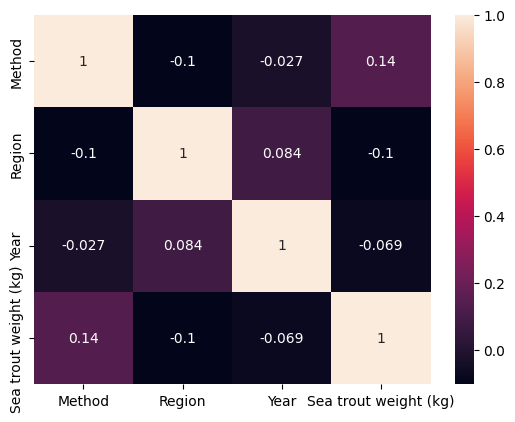

In [58]:
data_cor1 = pd.DataFrame({'Method': salmon_data["Method"],"Region":salmon_data["Region"],"Year":salmon_data["Year"],"Sea trout weight (kg)":salmon_data["Sea trout weight (kg)"]}, index=[i for i in range(len(salmon_data["Method"]))])
# Use a dictionary to define the data and column name.
# The index is specified separately.
# Now 'Region' is no longer mistakenly passed as 'index'

print(data_cor1)
cor1matrix_1 = data_cor1.corr()
sns.heatmap(cor1matrix_1, annot=True)
plt.show()

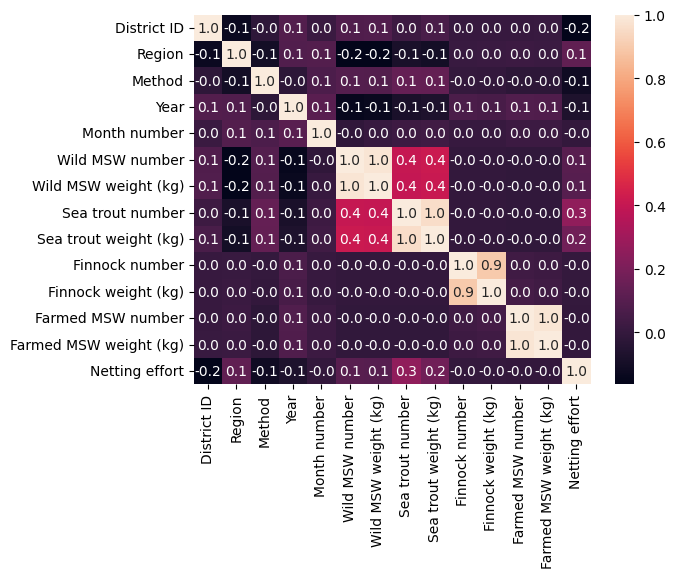

In [61]:
colmatrix_all = salmon_data.corr()
sns.heatmap(colmatrix_all, annot=True,fmt=".1f")
plt.show()

In [66]:
salmon_data2method=salmon_data[( salmon_data['Method']==1 ) | ( salmon_data['Method']==3 )]
salmon_data2method.head()
print(len(salmon_data2method))

23102


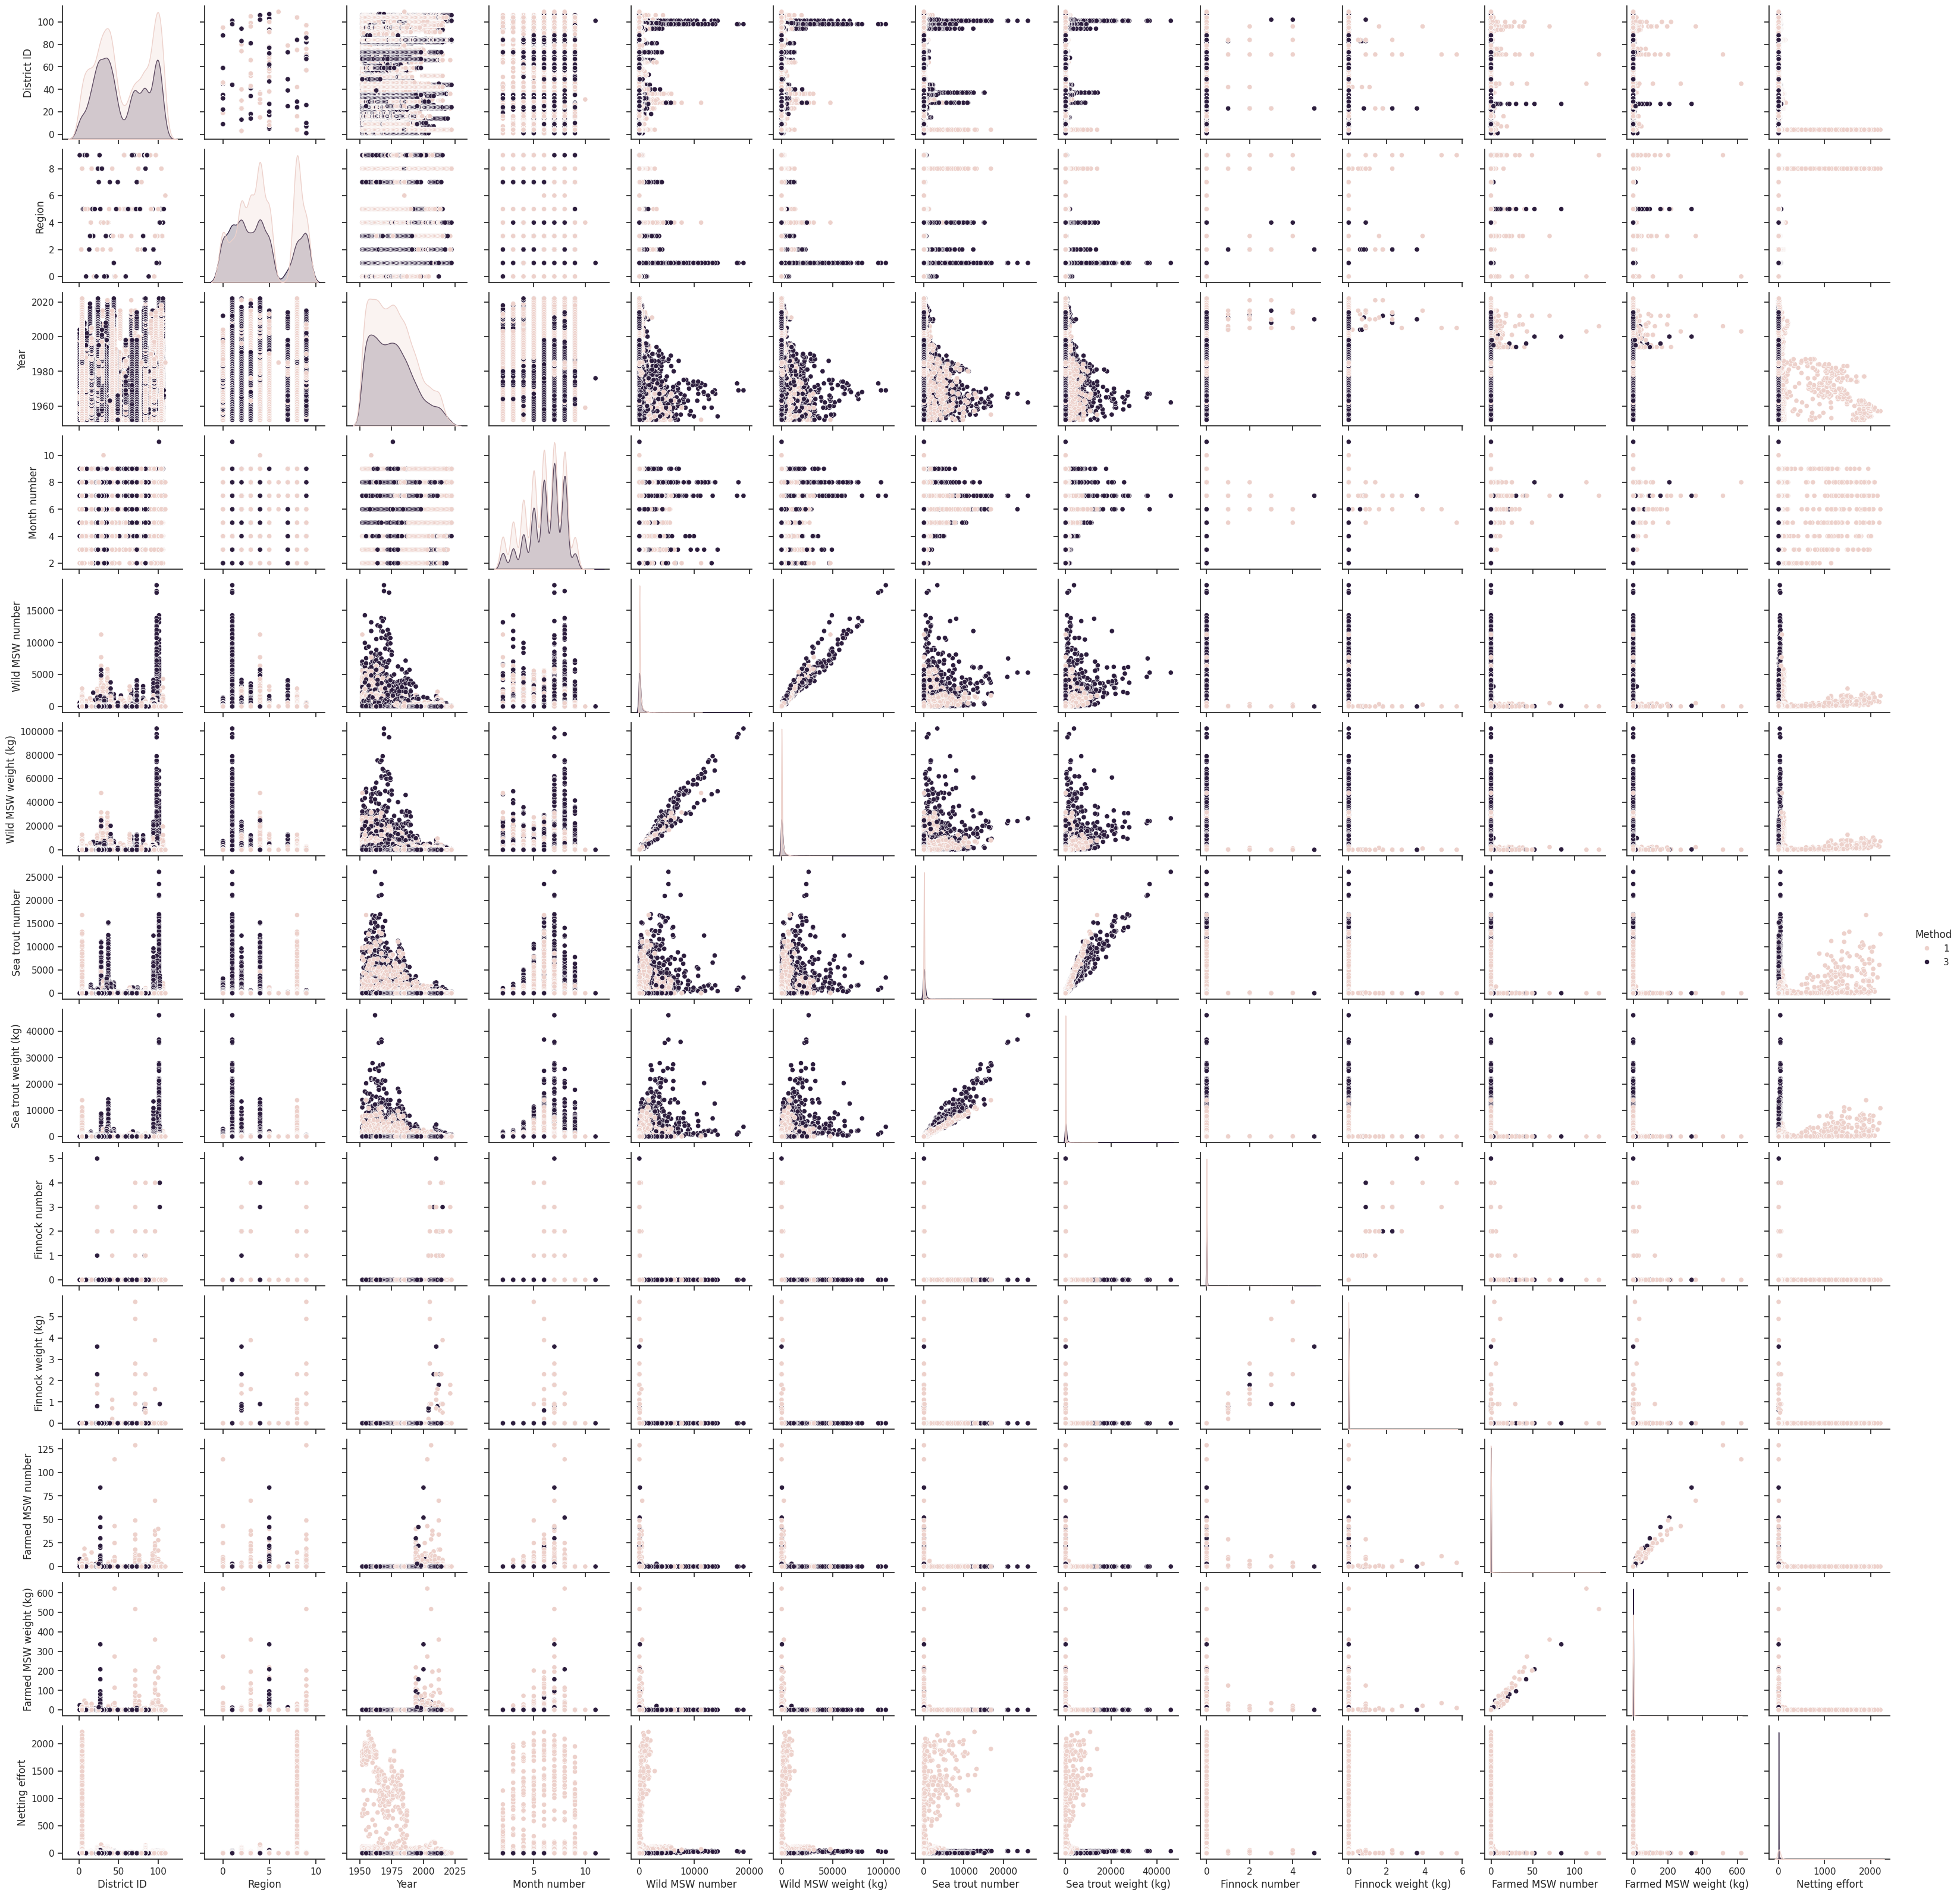

In [67]:
sns.set_theme(style="ticks")
sns.pairplot(salmon_data2method, hue="Method")
plt.show()


## 計算2種方法的總投入量

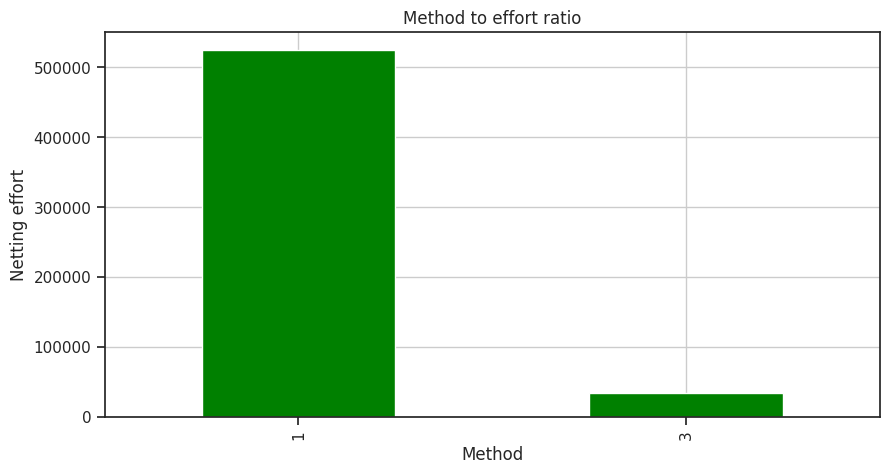

In [71]:
method_effort=salmon_data2method.groupby('Method')["Netting effort"].sum()
plt.figure(figsize=(10, 5))
method_effort.plot(kind='bar', color='green')
plt.title('Method to effort ratio')
plt.xlabel('Method')
plt.ylabel('Netting effort')
plt.xticks(rotation=90)
plt.grid(True);

## 算總重量

## 公式 : Wild Fish  

In [73]:
salmon_data2method.loc[:, 'Wild fish (kg)'] = salmon_data2method['Wild MSW weight (kg)']+salmon_data2method['Sea trout weight (kg)'] + salmon_data2method['Finnock weight (kg)']


<ipython-input-73-65ad76f8c27d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon_data2method.loc[:, 'Wild fish (kg)'] = salmon_data2method['Wild MSW weight (kg)']+salmon_data2method['Sea trout weight (kg)'] + salmon_data2method['Finnock weight (kg)']


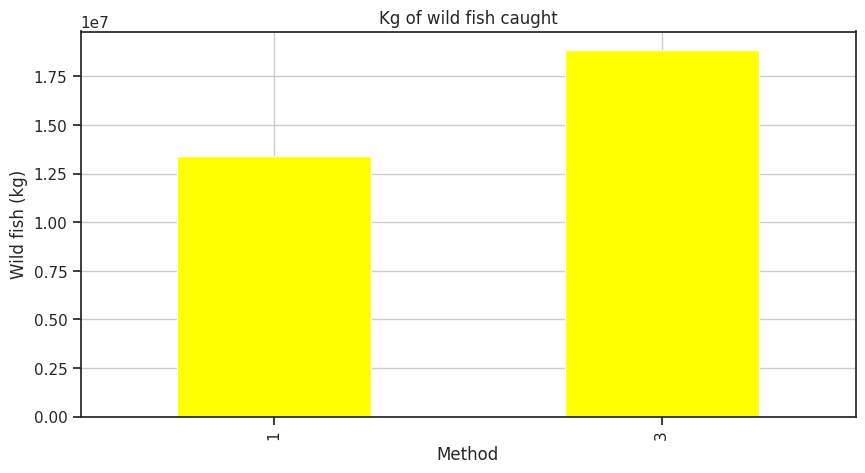

In [74]:
method_wild_fish=salmon_data2method.groupby('Method')["Wild fish (kg)"].sum()
plt.figure(figsize=(10, 5))
method_wild_fish.plot(kind='bar', color='yellow')
plt.title('Kg of wild fish caught')
plt.xlabel('Method')
plt.ylabel('Wild fish (kg)')
plt.grid(True)

## 再試一次相關係數熱力圖

## 重取columns :

## 包含method + year + netting effort + Wild fish (kg) (野外捕捉於重量總和) + 其他

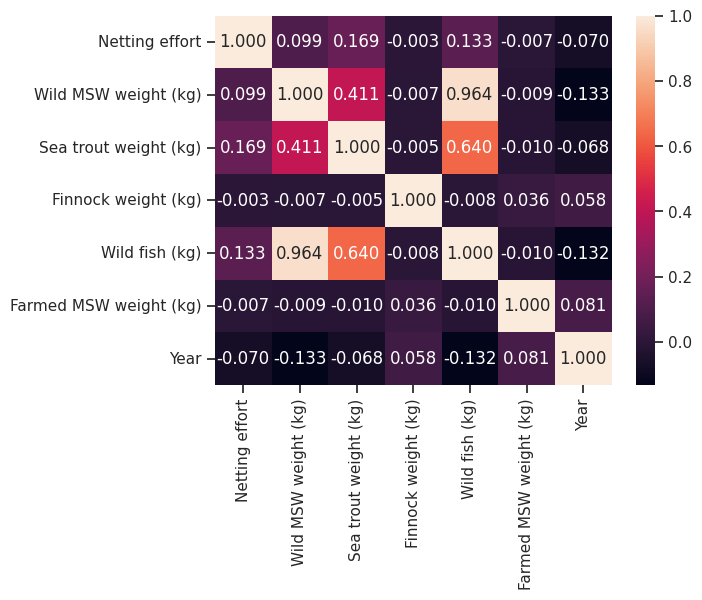

In [78]:
indicators = salmon_data2method[['Netting effort', 'Wild MSW weight (kg)',
       'Sea trout weight (kg)', 'Finnock weight (kg)', 'Wild fish (kg)', 'Farmed MSW weight (kg)',"Year"]]

sns.heatmap(indicators.corr(), annot=True, fmt=".3f")
plt.show()
